## Lesson 5 - Facebook , Instagram Analytics & jieba




### Table of Contents

* [Facebook Posts](#fbposts)
* [Facebook Comments](#fbcomments)
* [Instagram Posts](#igposts)
* [PTT](#ptt)
* [Jieba & Wordcloud](#jieba)

<a id="fbposts"></a>
### Load Facebook posts csv from file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

In [2]:
# Read posts data from csv
df_posts = pd.read_csv("data/facebook/appledailytw_facebook_posts.csv")
df_posts.head(1)

Unnamed: 0                 datetime                    link_name  \
0           0  2019-08-12 15:54:12.591  ‚Äã„ÄêÊüØPÂâµÈª®„ÄëÈÅ∏‰∏çÈÅ∏Á∏ΩÁµ±ÔºüÊüØÊñáÂì≤Ôºö‰πùÊúà‰∏äÊó¨Â∞±ÊòØÊúÄÂæåÊôÇÈñì   

   num_comments  num_reactions  num_shares                       status_id  \
0           180            282           1  232633627068_10158286637462069   

              status_link                                     status_message  \
0  https://bit.ly/2SVkP0I  ÊúüÂæÖ‰πùÊúàÁöÑÂà∞‰æÜ( Õ°¬∞ Õú ñ Õ°¬∞)\r\n„ÄÄ\r\n„ÄêÊüØÔº∞Ââµ„ÄåÂè∞ÁÅ£Ê∞ëÁúæÈª®„ÄçÊâøË™çÁõÆÊ®ôÈÄ≤ËªçÂúãÊúÉ...   

      status_published status_type  
0  2019-08-01 10:26:57        link

In [3]:
if 'Unnamed: 0' in df_posts.columns:
    del df_posts['Unnamed: 0']
df_posts.head(1)

datetime                    link_name  num_comments  \
0  2019-08-12 15:54:12.591  ‚Äã„ÄêÊüØPÂâµÈª®„ÄëÈÅ∏‰∏çÈÅ∏Á∏ΩÁµ±ÔºüÊüØÊñáÂì≤Ôºö‰πùÊúà‰∏äÊó¨Â∞±ÊòØÊúÄÂæåÊôÇÈñì           180   

   num_reactions  num_shares                       status_id  \
0            282           1  232633627068_10158286637462069   

              status_link                                     status_message  \
0  https://bit.ly/2SVkP0I  ÊúüÂæÖ‰πùÊúàÁöÑÂà∞‰æÜ( Õ°¬∞ Õú ñ Õ°¬∞)\r\n„ÄÄ\r\n„ÄêÊüØÔº∞Ââµ„ÄåÂè∞ÁÅ£Ê∞ëÁúæÈª®„ÄçÊâøË™çÁõÆÊ®ôÈÄ≤ËªçÂúãÊúÉ...   

      status_published status_type  
0  2019-08-01 10:26:57        link

In [4]:
df_posts["Âπ¥ÊúàÊó•"] = df_posts["status_published"].apply(lambda x: str(x)[:10])
df_posts.head(1)

datetime                    link_name  num_comments  \
0  2019-08-12 15:54:12.591  ‚Äã„ÄêÊüØPÂâµÈª®„ÄëÈÅ∏‰∏çÈÅ∏Á∏ΩÁµ±ÔºüÊüØÊñáÂì≤Ôºö‰πùÊúà‰∏äÊó¨Â∞±ÊòØÊúÄÂæåÊôÇÈñì           180   

   num_reactions  num_shares                       status_id  \
0            282           1  232633627068_10158286637462069   

              status_link                                     status_message  \
0  https://bit.ly/2SVkP0I  ÊúüÂæÖ‰πùÊúàÁöÑÂà∞‰æÜ( Õ°¬∞ Õú ñ Õ°¬∞)\r\n„ÄÄ\r\n„ÄêÊüØÔº∞Ââµ„ÄåÂè∞ÁÅ£Ê∞ëÁúæÈª®„ÄçÊâøË™çÁõÆÊ®ôÈÄ≤ËªçÂúãÊúÉ...   

      status_published status_type         Âπ¥ÊúàÊó•  
0  2019-08-01 10:26:57        link  2019-08-01

In [5]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

In [6]:
df_posts['hour'] = hour(df_posts['status_published'])
df_posts['weekday'] = weekday(df_posts['status_published'])
df_posts.head(1)

datetime                    link_name  num_comments  \
0  2019-08-12 15:54:12.591  ‚Äã„ÄêÊüØPÂâµÈª®„ÄëÈÅ∏‰∏çÈÅ∏Á∏ΩÁµ±ÔºüÊüØÊñáÂì≤Ôºö‰πùÊúà‰∏äÊó¨Â∞±ÊòØÊúÄÂæåÊôÇÈñì           180   

   num_reactions  num_shares                       status_id  \
0            282           1  232633627068_10158286637462069   

              status_link                                     status_message  \
0  https://bit.ly/2SVkP0I  ÊúüÂæÖ‰πùÊúàÁöÑÂà∞‰æÜ( Õ°¬∞ Õú ñ Õ°¬∞)\r\n„ÄÄ\r\n„ÄêÊüØÔº∞Ââµ„ÄåÂè∞ÁÅ£Ê∞ëÁúæÈª®„ÄçÊâøË™çÁõÆÊ®ôÈÄ≤ËªçÂúãÊúÉ...   

      status_published status_type         Âπ¥ÊúàÊó•  hour  weekday  
0  2019-08-01 10:26:57        link  2019-08-01    10        4

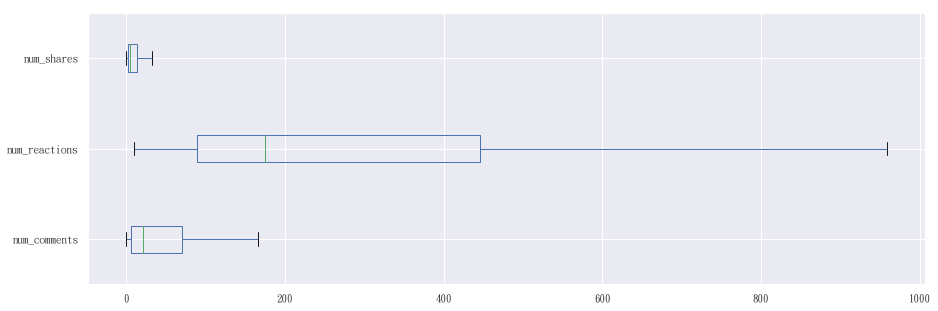

In [7]:
plot = df_posts[['num_comments','num_reactions', 'num_shares']].plot.box(figsize=(15,5), vert=False, showfliers=False)

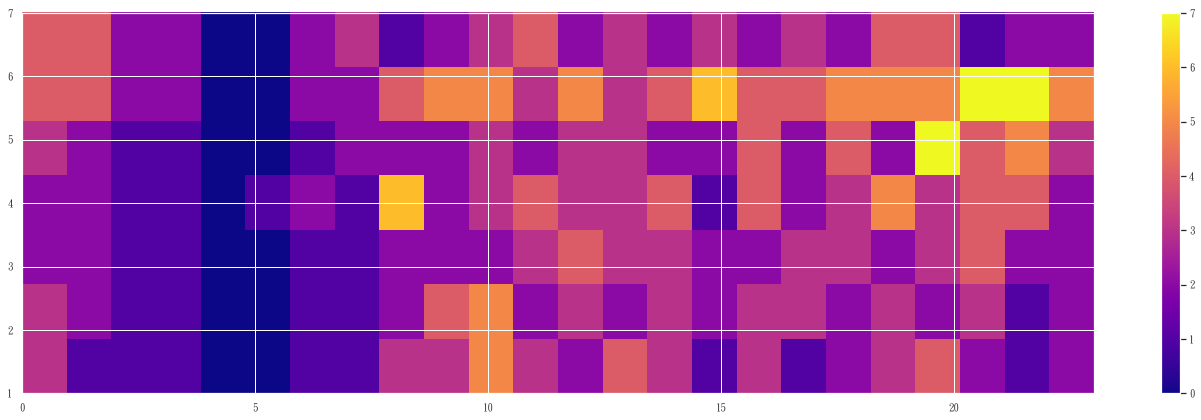

In [8]:
# Âë®Èñì„ÄÅ24Â∞èÊôÇÁôºÊñáÁöÑÁÜ±Â∫¶
plt.figure(figsize=(24,7))
plt.hist2d(df_posts['hour'], df_posts['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

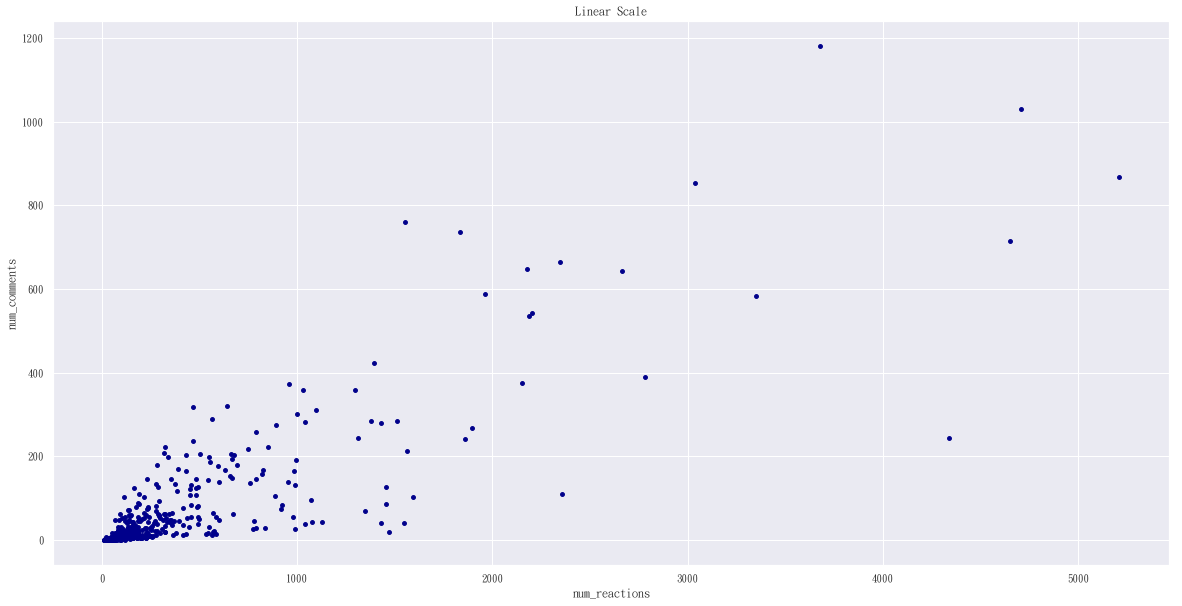

In [9]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
df_posts.plot.scatter(x='num_reactions',y='num_comments',c='DarkBlue',ax=ax[1], s=15)
plt.show()

<a id="fbcomments"></a>
### Load Facebook comments csv from file

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

In [11]:
# Read comments data from csv
df_comments = pd.read_csv("data/facebook/appledailytw_facebook_comments.csv")
df_comments.head(1)

Unnamed: 0  comment_author                           comment_id  \
0           0             NaN  10158286637462069_10158286693292069   

                                     comment_message    comment_published  \
0  Âà•Ë¢´Èï∑ÊúüÈÖ∏‰ªñÁöÑÂêçÂò¥Ë™™‰∏≠ÔºåÂéªÈÅ∏Á∏ΩÁµ±Ôºå\r\n‰∏çÁÑ∂ÂæàÈõ£Áúã„ÄÇ\r\n\r\nÂêçÂò¥Èô∞Ë¨ÄË´ñË™™ÊüØË¶ÅÂæÄÊù±Ôºå...  2019-08-01 10:53:58   

                  datetime  num_reactions parent_id  \
0  2019-08-13 12:58:12.718              1       NaN   

                        status_id  
0  232633627068_10158286637462069

In [12]:
if 'Unnamed: 0' in df_comments.columns:
    del df_comments['Unnamed: 0']
df_comments.head(1)

comment_author                           comment_id  \
0             NaN  10158286637462069_10158286693292069   

                                     comment_message    comment_published  \
0  Âà•Ë¢´Èï∑ÊúüÈÖ∏‰ªñÁöÑÂêçÂò¥Ë™™‰∏≠ÔºåÂéªÈÅ∏Á∏ΩÁµ±Ôºå\r\n‰∏çÁÑ∂ÂæàÈõ£Áúã„ÄÇ\r\n\r\nÂêçÂò¥Èô∞Ë¨ÄË´ñË™™ÊüØË¶ÅÂæÄÊù±Ôºå...  2019-08-01 10:53:58   

                  datetime  num_reactions parent_id  \
0  2019-08-13 12:58:12.718              1       NaN   

                        status_id  
0  232633627068_10158286637462069

In [13]:
df_comments["Âπ¥ÊúàÊó•"] = df_comments["comment_published"].apply(lambda x: str(x)[:10])
df_comments.head(1)

comment_author                           comment_id  \
0             NaN  10158286637462069_10158286693292069   

                                     comment_message    comment_published  \
0  Âà•Ë¢´Èï∑ÊúüÈÖ∏‰ªñÁöÑÂêçÂò¥Ë™™‰∏≠ÔºåÂéªÈÅ∏Á∏ΩÁµ±Ôºå\r\n‰∏çÁÑ∂ÂæàÈõ£Áúã„ÄÇ\r\n\r\nÂêçÂò¥Èô∞Ë¨ÄË´ñË™™ÊüØË¶ÅÂæÄÊù±Ôºå...  2019-08-01 10:53:58   

                  datetime  num_reactions parent_id  \
0  2019-08-13 12:58:12.718              1       NaN   

                        status_id         Âπ¥ÊúàÊó•  
0  232633627068_10158286637462069  2019-08-01

In [14]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

In [15]:
df_comments['hour'] = hour(df_comments['comment_published'])
df_comments['weekday'] = weekday(df_comments['comment_published'])
df_comments.head(1)

comment_author                           comment_id  \
0             NaN  10158286637462069_10158286693292069   

                                     comment_message    comment_published  \
0  Âà•Ë¢´Èï∑ÊúüÈÖ∏‰ªñÁöÑÂêçÂò¥Ë™™‰∏≠ÔºåÂéªÈÅ∏Á∏ΩÁµ±Ôºå\r\n‰∏çÁÑ∂ÂæàÈõ£Áúã„ÄÇ\r\n\r\nÂêçÂò¥Èô∞Ë¨ÄË´ñË™™ÊüØË¶ÅÂæÄÊù±Ôºå...  2019-08-01 10:53:58   

                  datetime  num_reactions parent_id  \
0  2019-08-13 12:58:12.718              1       NaN   

                        status_id         Âπ¥ÊúàÊó•  hour  weekday  
0  232633627068_10158286637462069  2019-08-01    10        4

In [16]:
contentWordCount = 0
contentTotalWordCount = []

for message in df_comments['comment_message']:
    contentWordCount = 0
    if type(message) is not float:
        contentWordCount += len("".join(message.split()))
    else:
        contentWordCount += 0
    contentTotalWordCount.append(contentWordCount)

In [17]:
df_comments['comment_word_count'] = contentTotalWordCount
df_comments.head(1)

comment_author                           comment_id  \
0             NaN  10158286637462069_10158286693292069   

                                     comment_message    comment_published  \
0  Âà•Ë¢´Èï∑ÊúüÈÖ∏‰ªñÁöÑÂêçÂò¥Ë™™‰∏≠ÔºåÂéªÈÅ∏Á∏ΩÁµ±Ôºå\r\n‰∏çÁÑ∂ÂæàÈõ£Áúã„ÄÇ\r\n\r\nÂêçÂò¥Èô∞Ë¨ÄË´ñË™™ÊüØË¶ÅÂæÄÊù±Ôºå...  2019-08-01 10:53:58   

                  datetime  num_reactions parent_id  \
0  2019-08-13 12:58:12.718              1       NaN   

                        status_id         Âπ¥ÊúàÊó•  hour  weekday  \
0  232633627068_10158286637462069  2019-08-01    10        4   

   comment_word_count  
0                  50

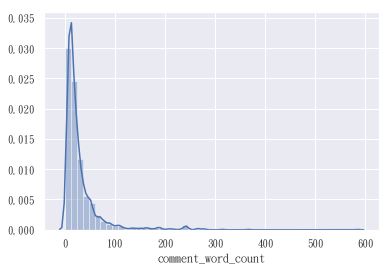

In [18]:
# Êü•ÁúãÁïôË®ÄÂ≠óÊï∏ÂàÜÂ∏É
sns.distplot(df_comments['comment_word_count'])

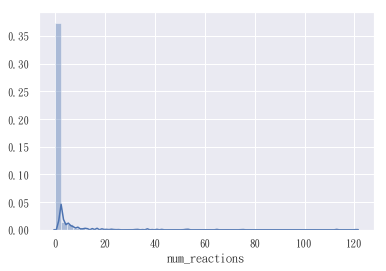

In [19]:
# Â§ßÂ§öÊï∏ÁïôË®ÄÊ≤íÊúâ‰∫íÂãï
sns.distplot(df_comments['num_reactions'])

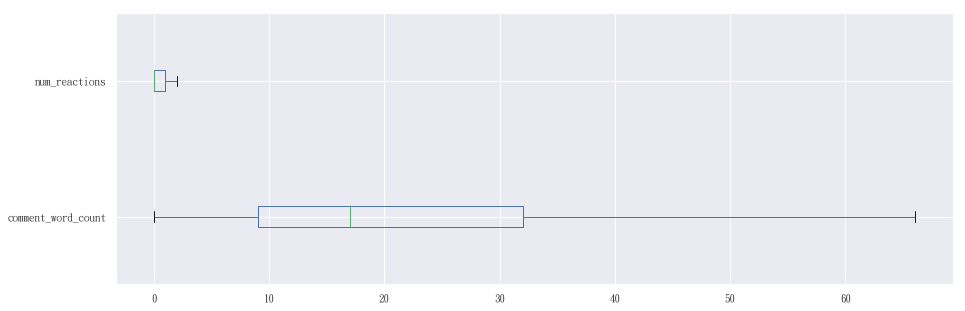

In [20]:
plot = df_comments[['comment_word_count','num_reactions']].plot.box(figsize=(15,5), vert=False, showfliers=False)

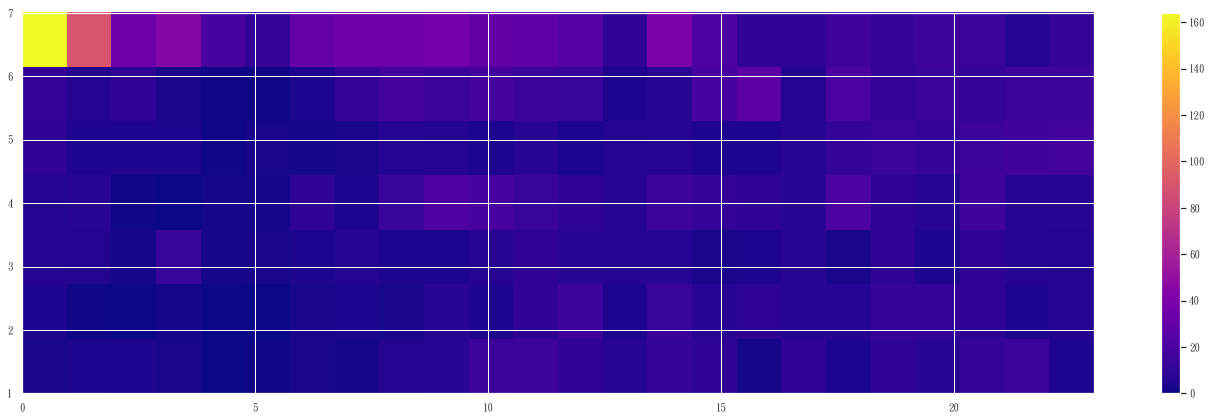

In [21]:
# Âë®Èñì„ÄÅ24Â∞èÊôÇ ÁïôË®Ä ÁöÑÁÜ±Â∫¶
plt.figure(figsize=(24,7))
plt.hist2d(df_comments['hour'], df_comments['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

<a id="igposts"></a>
##  Instagram‰∏äÁöÑÁôºÊñáÂàÜ‰ΩàËàáË¶ñË¶∫ÂåñÂàÜÊûê

In [22]:
import pandas as pd

In [23]:
df_ig = pd.read_csv("data/pandas_data/ig_personal.csv")

In [24]:
# df_ig.shape[0]
len(df_ig.index)

100028

In [25]:
if 'Unnamed: 0' in df_ig.columns:
    del df_ig['Unnamed: 0']
df_ig.head(1)

comments_count                                       content  \
0             1.0  #ËÆ∞‰∏ÄÊ¨°  ÊºîÂî±‰ºöüìçÂåó‰∫¨\r\n\r\nÂÆâÈùôÂú∞Âê¨üëÇüèª\r\nÊàëÁà±ÁöÑÂ∞ëÂπ¥\r\nÂî±Ê≠åÔΩûüé§üé∂   

  followers_count  following_count is_business_account  likes_count  \
0              26            135.0               False         33.0   

             post_time post_timestamp  posts_count         username  
0  2018-10-23 17:18:18     1540286298          5.0  tangkuai_er1206

In [26]:
contentWordCount = 0
contentTotalWordCount = []

for message in df_ig['content']:
    contentWordCount = 0
    if type(message) is not float:
        contentWordCount += len("".join(message.split()))
    else:
        contentWordCount += 0
    contentTotalWordCount.append(contentWordCount)

In [27]:
df_ig['postWordCount'] = contentTotalWordCount
df_ig.head(1)

comments_count                                       content  \
0             1.0  #ËÆ∞‰∏ÄÊ¨°  ÊºîÂî±‰ºöüìçÂåó‰∫¨\r\n\r\nÂÆâÈùôÂú∞Âê¨üëÇüèª\r\nÊàëÁà±ÁöÑÂ∞ëÂπ¥\r\nÂî±Ê≠åÔΩûüé§üé∂   

  followers_count  following_count is_business_account  likes_count  \
0              26            135.0               False         33.0   

             post_time post_timestamp  posts_count         username  \
0  2018-10-23 17:18:18     1540286298          5.0  tangkuai_er1206   

   postWordCount  
0             26

In [28]:
# ÈÄô‰∫õÊòØÈåØË™§ÁöÑ followers_countÔºåÁêÜÊáâÁÇ∫Êï∏ÂÄºÔºå‰ΩÜË≥áÊñôÈõÜ‰∏≠ÁÇ∫Â≠ó‰∏≤ TrueÔºåÁúã‰æÜÊòØÊ¨Ñ‰ΩçÈåØ‰ΩçÁöÑÂïèÈ°å
df_ig[df_ig["followers_count"]=="True"]

comments_count content followers_count  following_count  \
32212         60134.0    7350            True            432.0   
32216         60134.0    7350            True            478.0   
32225         60134.0    7350            True            279.0   
32232         60134.0    7350            True            471.0   
32238         60134.0    7350            True            285.0   
32242         60134.0    7350            True            286.0   
32251         60134.0    7350            True            352.0   
32259         60134.0    7350            True            330.0   
32265         60134.0    7350            True            450.0   
32273         60134.0    7350            True            460.0   
32284         60134.0    7350            True            334.0   
32288         60134.0    7350            True            185.0   
32290         60134.0    7350            True            237.0   
32294         60134.0    7350            True            539.0   
32299         60134.0    7350            True            626.0   
32302         60134.0    7350            True            261.0   
32314         60134.0    7350            True            472.0   
32322         60134.0    7350            True            507.0   
32354         60134.0    7350            True            209.0   
61452        108755.0     148            True            352.0   
61458        108755.0     148            True            273.0   
61466        108755.0     148            True            180.0   
99298           420.0    2545            True              6.0   

       is_business_account   likes_count post_time       post_timestamp  \
32212  2014-10-19 04:36:05  1.413665e+09      3074  bodyangelactivewear   
32216  2014-10-17 07:27:05  1.413502e+09      3074  bodyangelactivewear   
32225  2014-10-11 01:17:21  1.412961e+09      3074  bodyangelactivewear   
32232  2014-10-06 23:01:08  1.412608e+09      3074  bodyangelactivewear   
32238  2014-10-02 00:27:58  1.412181e+09      3074  bodyangelactivewear   
32242  2014-09-29 05:11:01  1.411939e+09      3074  bodyangelactivewear   
32251  2014-09-23 22:15:55  1.411482e+09      3074  bodyangelactivewear   
32259  2014-09-19 03:46:19  1.411070e+09      3074  bodyangelactivewear   
32265  2014-09-14 04:43:30  1.410641e+09      3074  bodyangelactivewear   
32273  2014-09-07 02:47:49  1.410029e+09      3074  bodyangelactivewear   
32284  2014-08-29 09:08:08  1.409274e+09      3074  bodyangelactivewear   
32288  2014-08-26 07:29:55  1.409009e+09      3074  bodyangelactivewear   
32290  2014-08-25 10:02:56  1.408932e+09      3074  bodyangelactivewear   
32294  2014-08-21 06:27:59  1.408574e+09      3074  bodyangelactivewear   
32299  2014-08-17 05:20:36  1.408224e+09      3074  bodyangelactivewear   
32302  2014-08-16 00:02:13  1.408119e+09      3074  bodyangelactivewear   
32314  2014-08-07 03:50:32  1.407355e+09      3074  bodyangelactivewear   
32322  2014-07-25 01:09:47  1.406222e+09      3074  bodyangelactivewear   
32354  2014-06-28 12:01:00  1.403928e+09      3074  bodyangelactivewear   
61452  2014-10-05 21:16:47  1.412515e+09      1899           rokasports   
61458  2014-09-14 21:14:25  1.410700e+09      1899           rokasports   
61466  2014-09-07 19:40:42  1.410090e+09      1899           rokasports   
99298  2018-01-14 20:26:32  1.515933e+09       214      ishoponline2017   

       posts_count username  postWordCount  
32212          NaN      NaN              4  
32216          NaN      NaN              4  
32225          NaN      NaN              4  
32232          NaN      NaN              4  
32238          NaN      NaN              4  
32242          NaN      NaN              4  
32251          NaN      NaN              4  
32259          NaN      NaN              4  
32265          NaN      NaN              4  
32273          NaN      NaN              4  
32284          NaN      NaN              4  
32288          NaN      NaN              4  
32290          NaN      NaN         

In [29]:
# Âà™Èô§ÈÄô‰∫õÈåØ‰ΩçÁöÑË≥áÊñôÁ≠ÜÊï∏
df_ig = df_ig.drop(df_ig[df_ig["followers_count"]=="True"].index)

In [30]:
# Âº∑Âà∂Â∞á followers_count Ê¨Ñ‰ΩçËΩâÊàê Êï∏ÂÄº
df_ig['followers_count'] = pd.to_numeric(df_ig['followers_count'], errors='coerce')

In [31]:
## Â∞áÂ≠ó‰∏≤Ê¨Ñ‰ΩçËΩâÂûãÂà•ÁÇ∫Êï¥Êï∏Ê¨Ñ‰Ωç
df_ig["comments_count"] = df_ig["comments_count"].fillna("0").astype(int)
df_ig["followers_count"] = df_ig["followers_count"].fillna("0").astype(int)
df_ig["following_count"] = df_ig["following_count"].fillna("0").astype(int)
df_ig["likes_count"] = df_ig["likes_count"].fillna("0").astype(int)
df_ig["posts_count"] = df_ig["posts_count"].fillna("0").astype(int)
df_ig["posts_count"] = df_ig["posts_count"].fillna("0").astype(int)
df_ig["post_time"] = df_ig["post_time"].fillna("na").astype(str)

In [32]:
# Âà™Èô§ÊôÇÈñìÁÇ∫ na ÈåØ‰ΩçÁöÑË≥áÊñôÁ≠ÜÊï∏
df_ig = df_ig.drop(df_ig[df_ig["post_time"]=="na"].index)

In [33]:
# ÂÜçÊ¨°Á¢∫Ë™çÁôºÊñáÊôÇÈñìÊòØÂê¶ÊúâÂ∞èÊñº10ÂÄãÂ≠óÊï∏ÁöÑ
df_ig[df_ig['post_time'].apply(lambda x: len(x) <= 10)]

comments_count content  followers_count  following_count  \
38654            3573     549                0              177   

       is_business_account  likes_count post_time post_timestamp  posts_count  \
38654  2017-12-16 01:50:44   1513360244       663      paco_dili            0   

      username  postWordCount  
38654      NaN              3

In [34]:
# Âà™Èô§‰ΩøÁî®ËÄÖÂêçÁ®±ÁÇ∫ na
df_ig = df_ig.dropna(subset=['username'])

In [35]:
# Á¢∫Ë™çÂ∑≤Á∂ìÊ≤íÊúâÁôºÊñáÊôÇÈñìÈåØË™§ÁöÑÂïèÈ°å
# df_ig = df_ig.drop(df_ig[df_ig['post_time'].apply(lambda x: len(x) <= 10)])
df_ig[df_ig['post_time'].apply(lambda x: len(x) <= 10)]

Empty DataFrame
Columns: [comments_count, content, followers_count, following_count, is_business_account, likes_count, post_time, post_timestamp, posts_count, username, postWordCount]
Index: []

In [36]:
df_ig.head(1)

comments_count                                       content  \
0               1  #ËÆ∞‰∏ÄÊ¨°  ÊºîÂî±‰ºöüìçÂåó‰∫¨\r\n\r\nÂÆâÈùôÂú∞Âê¨üëÇüèª\r\nÊàëÁà±ÁöÑÂ∞ëÂπ¥\r\nÂî±Ê≠åÔΩûüé§üé∂   

   followers_count  following_count is_business_account  likes_count  \
0               26              135               False           33   

             post_time post_timestamp  posts_count         username  \
0  2018-10-23 17:18:18     1540286298            5  tangkuai_er1206   

   postWordCount  
0             26

In [37]:
df_ig.to_parquet("results/ig_posts.parquet")

In [38]:
"Unique User Count : %d" % len(df_ig['username'].unique())

'Unique User Count : 528'

In [39]:
# filterFollower = df_ig[(df_ig['followers_count']<=10000) & (df_ig['followers_count']>=0) & (df_ig['posts_count']>=0) & (df_ig['likes_count']>=0) & (df_ig['comments_count']>=0)]

In [40]:
filterFollower = df_ig[(df_ig['followers_count']<=10000)&(df_ig['followers_count']>=0)&(df_ig['posts_count']>=0)&(df_ig['likes_count']>=0)&(df_ig['comments_count']>=0)]
filterPost = filterFollower
final = filterPost

In [41]:
"Filtered Unique User Count : %d" % len(filterPost['username'].unique())

'Filtered Unique User Count : 504'

In [42]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

In [43]:
final['hour'] = hour(final['post_time'])
final['weekday'] = weekday(final['post_time'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
groupbyUsermMean = final.groupby('username').mean()

In [45]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

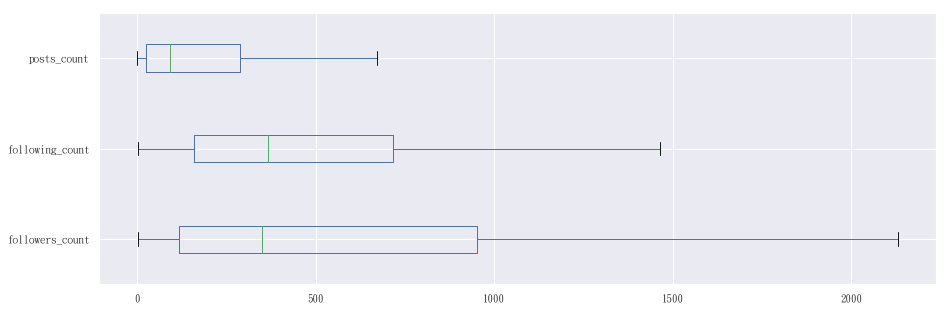

In [46]:
plot = groupbyUsermMean[['followers_count','following_count', 'posts_count']].plot.box(figsize=(15,5), vert=False, showfliers=False)

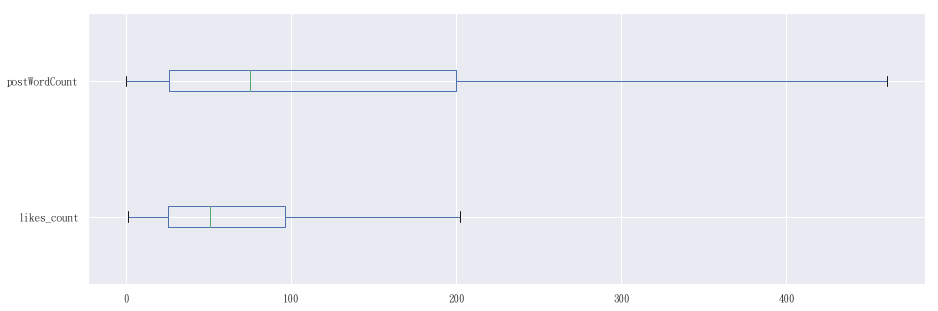

In [47]:
plot = final[['likes_count', 'postWordCount']].plot.box(figsize=(15,5), vert=False, showfliers=False)

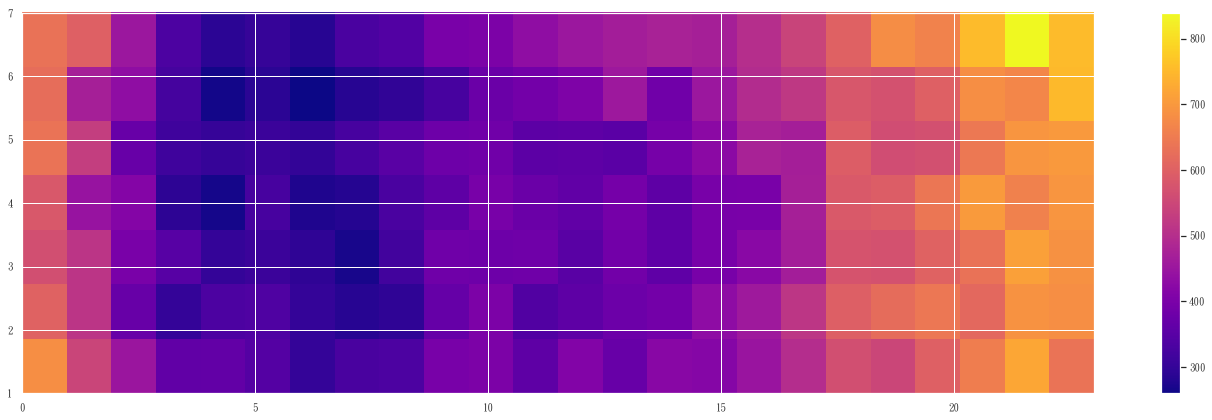

In [48]:
# Âë®Èñì„ÄÅ24Â∞èÊôÇÁôºÊñáÁöÑÁÜ±Â∫¶
plt.figure(figsize=(24,7))
plt.hist2d(final['hour'], final['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

### scatter by followers count and post count

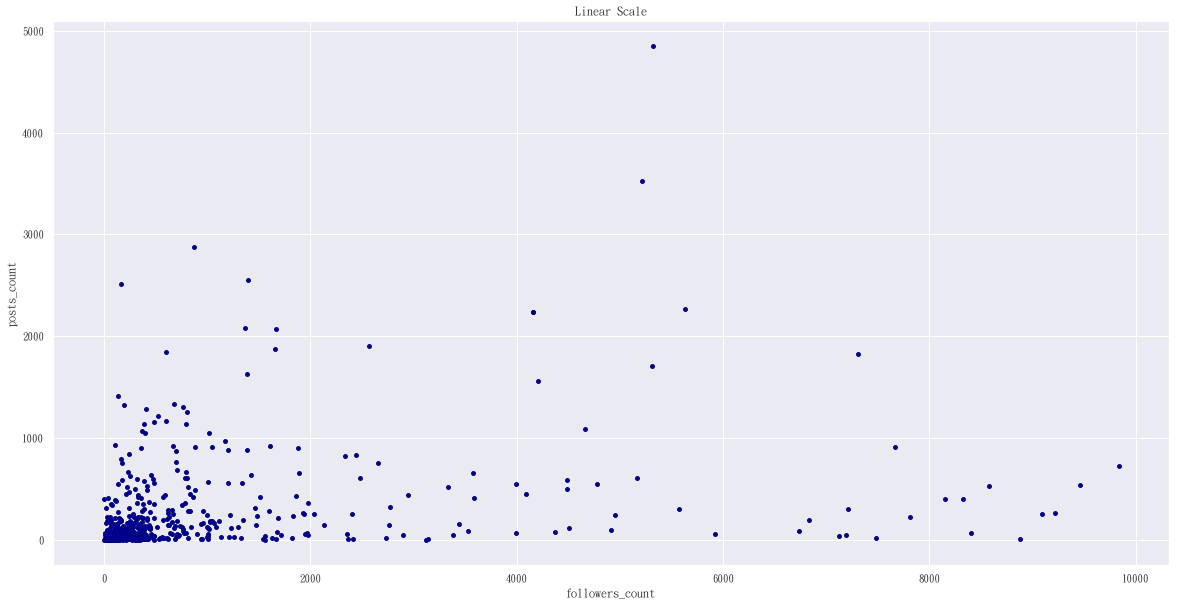

In [49]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='followers_count',y='posts_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

### correlation between following count and followers count

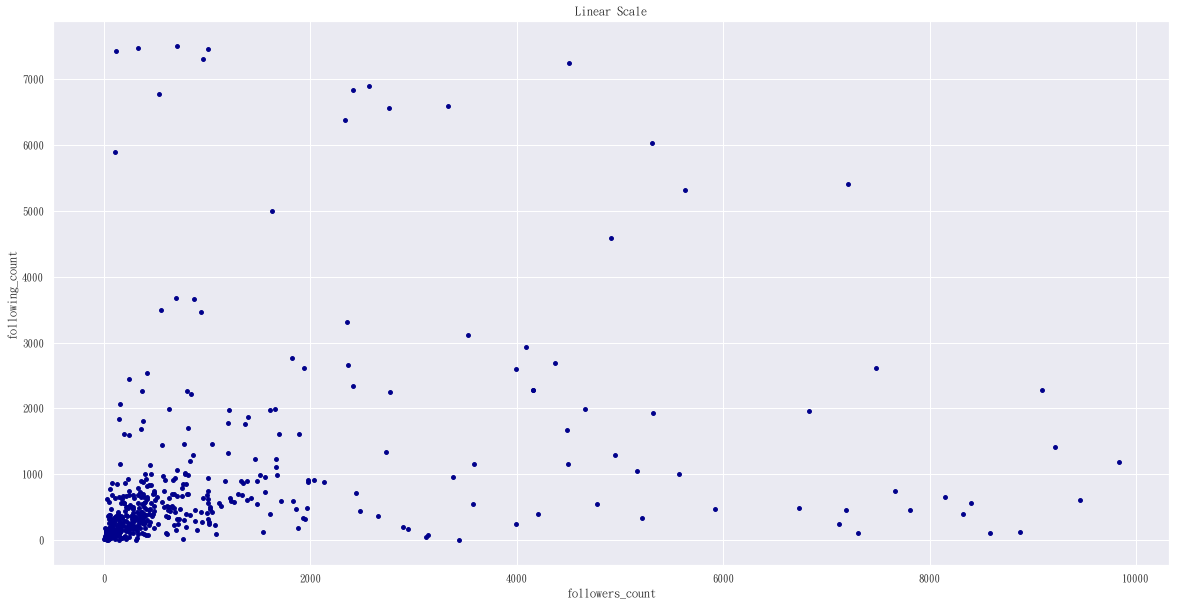

In [50]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='followers_count',y='following_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

### correlation between likes count and followers count

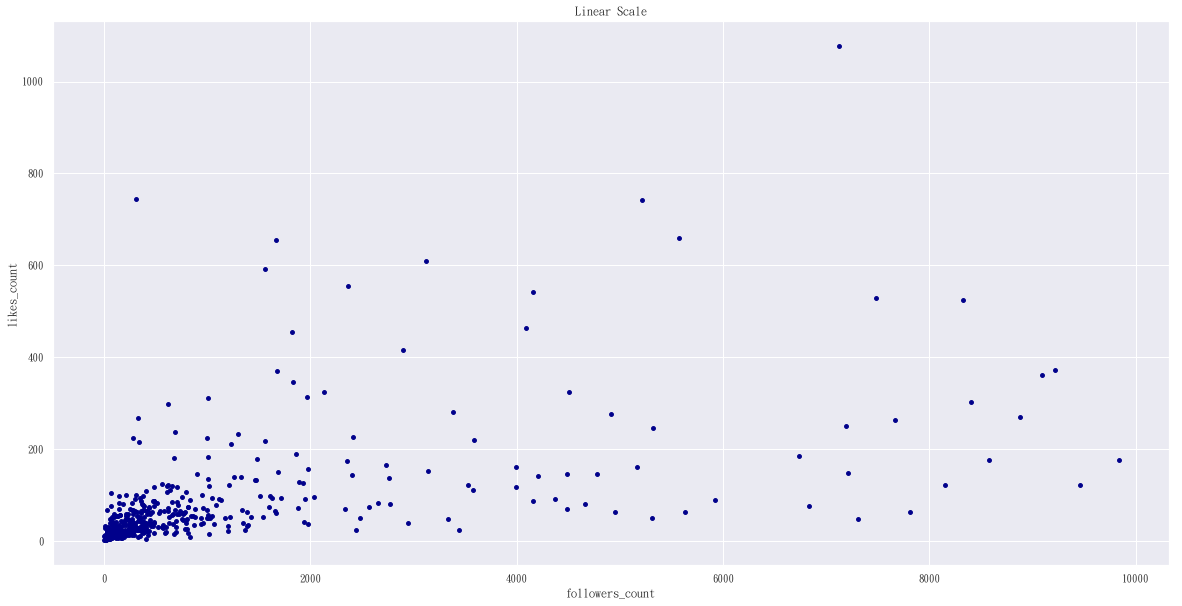

In [51]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='followers_count',y='likes_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

### Homework: your Instagram user insight?

Rules:
1. by adding column by combine several column, like ratio, to see what happened?
2. can you classify different follower count, to see the difference?

<a id="ptt"></a>
### Load PTT posts xlsx from file

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

df_ = pd.read_excel ('data/ptt/ptt_post_comments.xlsx')
df_.head(1)

Unnamed: 0                       _id      board  \
0           1  5dba40ec8572012ce7c3d40a  Gossiping   

                                title    author  \
0  Re: [Êñ∞ËÅû] Ê°ÉÂ∏ÇÂâçÁ∂ìÁôºÂ±ÄÈï∑Â∏∂Â•≥ÂèãÈñãÊàøÈñì„ÄÄ„ÄåÂ®ÅËÄåÈãº„ÄçË¶ÅÊ±ÇÂª†ÂïÜÂüãÂñÆ  kingtama   

                                             content                date  \
0  \nÈÄôÂÄã‰ºº‰πé‰∏çÂñÆÁ¥î\n\nÊú±ÊùæÂÅâÊãøÂéªÈ§µÁãó\n\nÁµêÊûúÈÇÑÂá∫ÁèæÂÅ•Ë°åÁßëÂ§ß\n\nÊòØÂêå‰∏ÄÂÄã‰∫∫Âóé??\... 2019-10-31 10:02:46   

               ip locale                                           comments  \
0  60.248.140.205   (Ëá∫ÁÅ£)  [{'user': 'deann', 'content': ': Âú®ÂÅ•Ë°åÁßëÂ§ßË¶ÅÊ∑∑ÊïôËÅ∑Ë†ªÁ∞°ÂñÆÁöÑ...   

   score                                                url  \
0      0  https://www.ptt.cc/bbs/Gossiping/M.1572487369....   

               updatetime  word_count  comment_word_count  comment_count  \
0 2019-10-31 10:03:24.375          56                  18              1   

   average_comment_word_count       post_published  hour  weekday  
0                        18.0  2019-10-31 10:02:46    10        4

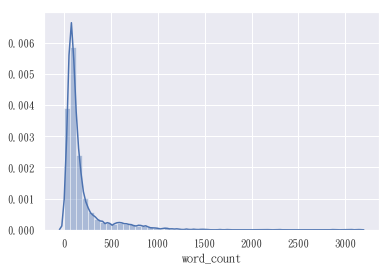

In [53]:
# Êü•ÁúãÁôºÊñáÂ≠óÊï∏ÂàÜÂ∏É
sns.distplot(df_['word_count'])

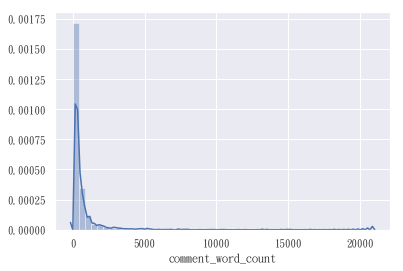

In [54]:
# Êü•ÁúãÁïôË®ÄÂ≠óÊï∏ÂàÜÂ∏É
sns.distplot(df_['comment_word_count'])

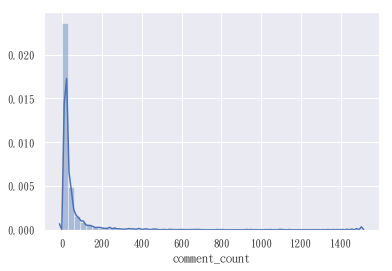

In [55]:
# ÁôºÊñáÁïôË®ÄÁöÑÂàÜÂ∏É
sns.distplot(df_['comment_count'])

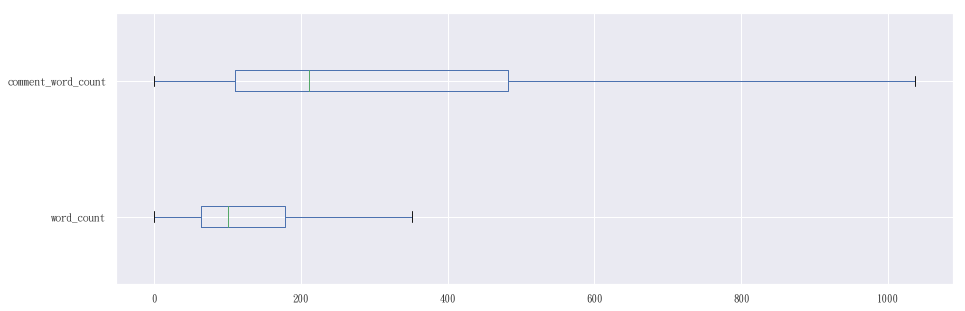

In [56]:
plot = df_[['word_count','comment_word_count']].plot.box(figsize=(15,5), vert=False, showfliers=False)

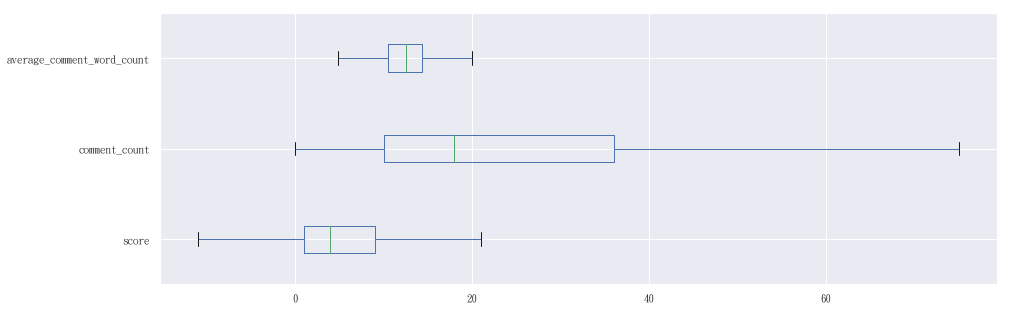

In [57]:
plot = df_[['score','comment_count', 'average_comment_word_count']].plot.box(figsize=(15,5), vert=False, showfliers=False)

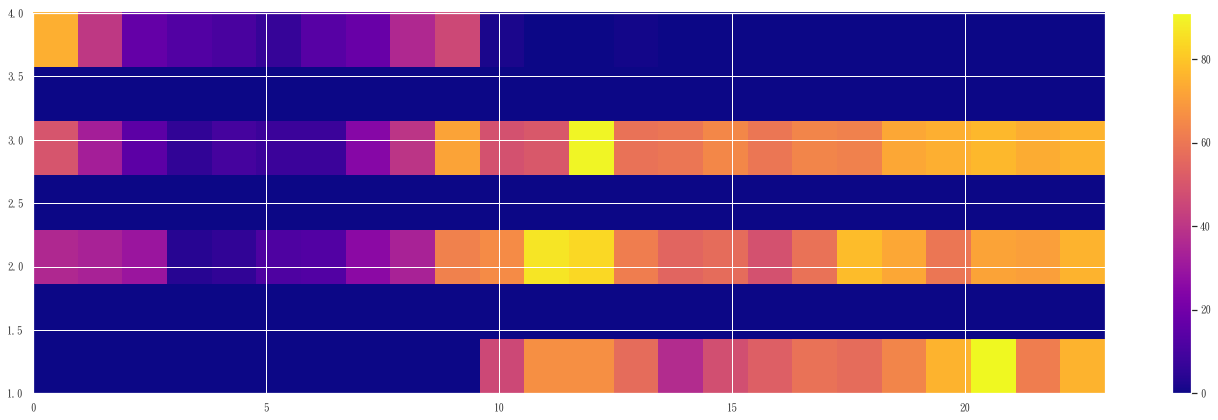

In [58]:
# Âë®Èñì„ÄÅ24Â∞èÊôÇÁôºÊñáÁöÑÁÜ±Â∫¶
plt.figure(figsize=(24,7))
plt.hist2d(df_['hour'], df_['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

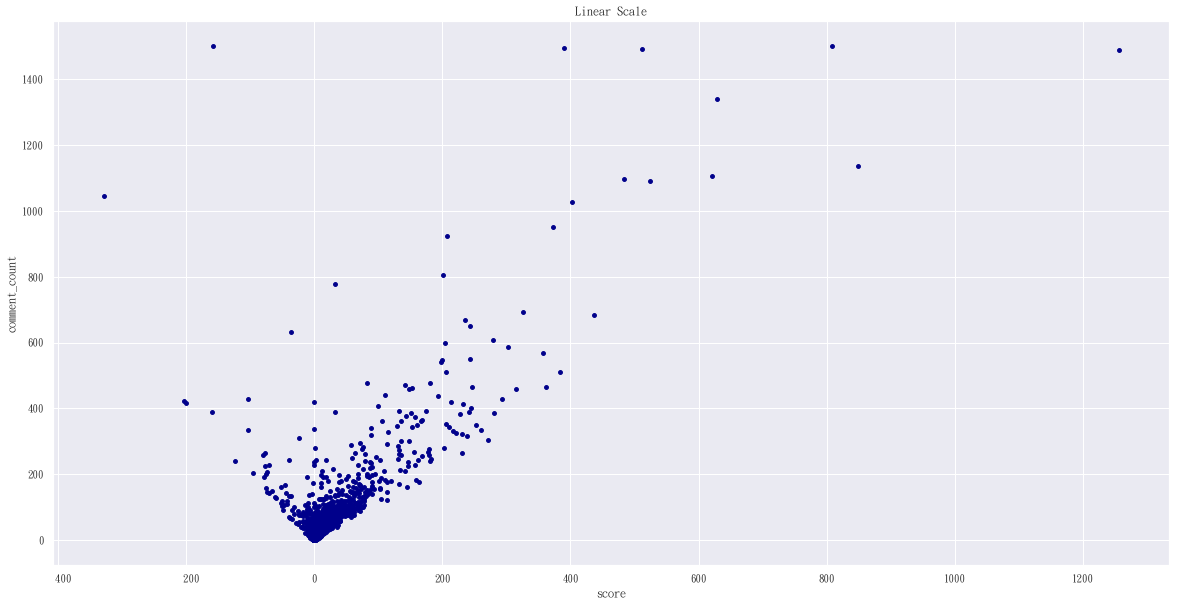

In [59]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
df_.plot.scatter(x='score',y='comment_count',c='DarkBlue',ax=ax[1], s=15)
plt.show()

In [60]:
"Unique PTT User Count : %d" % len(df_['author'].unique())

'Unique PTT User Count : 1759'

### Homework
- extract comment datetime
- check engagement by hour using heat map
- what did you find?

<a id="jieba"></a>
### Jieba in Chinese

In [61]:
# ‰∏≠ÊñáÂàÜË©û
import jieba

jieba.initialize()

seg_list = jieba.cut("Êàë‰æÜËá™ÊàêÂäüÂ§ßÂ≠∏Ë≥áË®äÂ∑•Á®ãÁ≥ª")
print(" / ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.cache
Loading model cost 0.812 seconds.
Prefix dict has been built succesfully.


Êàë‰æÜ / Ëá™ / ÊàêÂäü / Â§ßÂ≠∏ / Ë≥áË®ä / Â∑•Á®ãÁ≥ª


In [62]:
# ÂÖ®Ê®°Âºè
seg_list = jieba.cut("Êàë‰æÜËá™ÊàêÂäüÂ§ßÂ≠∏Ë≥áË®äÂ∑•Á®ãÁ≥ª", cut_all=True)
print(" / ".join(seg_list))

Êàë / ‰æÜ / Ëá™Êàê / ÊàêÂäü / Â§ß / Â≠∏ / Ë≥á / Ë®ä / Â∑•Á®ã / Â∑•Á®ãÁ≥ª


In [63]:
seg_list = jieba.cut("ÊàëÂÄëÂéª‰∫ÜÊó•Êú¨Ëø™Â£´Â∞ºÊ®ÇÂúí", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))

ÊàëÂÄë / Âéª / ‰∫Ü / Êó•Êú¨ / Ëø™Â£´Â∞º / Ê®ÇÂúí
We / went / to / Disneyland / in / Japan


### load_userdict ‰ΩøÁî®ËÄÖËá™ÂÆöÁæ©Â≠óÂÖ∏

In [64]:
jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

seg_list = jieba.cut("ÊàëÂÄëÂéª‰∫ÜÊó•Êú¨Ëø™Â£´Â∞ºÊ®ÇÂúí", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))

ÊàëÂÄë / Âéª / ‰∫Ü / Êó•Êú¨ / Ëø™Â£´Â∞ºÊ®ÇÂúí
We / went / to / Disneyland / in / Japan


## Facebook comments most use words in Chinese

In [65]:
# clean text, store into different column
df_comments["clean_message"] = df_comments["comment_message"].apply(lambda x: str(x).strip().replace('\n','').replace('\r',''))

In [66]:
df_comments["clean_message"][15:20]

15         Á¨ëÊÆ∫Â∞èÂï¶Ë•ô‰Ω†Â™ΩÈÇ£‰∫õÊåâÁ¨ëÁöÑ‰Ω†ÂÄëÊ†πÊú¨Ê≤í‰∫∫ÊÄßÊ∑πÈÄôÈ∫ºÊÖòÊòØÁµ¶‰Ω†ÂÄëÁ¨ë?ÊúâÁ®ÆÊòéÂ§©ÈÉΩ‰æÜÊ°ÉÂúíÊâæÊàëËº∏Ë¥èÊàëÊìçÔºÅ
16                            È´òÈõÑÊúâÂ¶ñÂ≠Ω„ÄÇÈªÉËÄÅÂ¶ñ ÈüìË°ìÂ£´üáπüáº [[PHOTO]]
17    https://hssszn.com/archives/64308?fbclid=IwAR1...
18                                     Âì™ÊòØÂèóÂà∞‰∏≠ÁæéÊà∞Áà≠ÂΩ±ÈüøÔºåÊú¨‰æÜÂ∞±Ë≥†‰∫Ü
19    Âú®Â§ßÈô∏Á∂ìÂïÜÔºåË¶ÅÈ∫ºÂ≠∏Ëî°Êó∫Êó∫ÔºåÂÖÖÁï∂Á¥ÖËâ≤Êª≤ÈÄèÈ¶¨ÂâçÂçíÔºåË¶ÅÈ∫ºÂÆπË®±Á¥Ö‰∫å‰ª£Áï∂Âú∞ÂÆòÂì°ÈÇÑÊúâÂú∞È†≠ËõáÂÖ•‰πæËÇ°ÔºåÂê¶ÂâáÊ≥®...
Name: clean_message, dtype: object

In [67]:
for x in df_comments["clean_message"][15:20]:
    seg_list = jieba.cut(x, cut_all=False)
    segments = ""
    for s in seg_list:
        segments = segments + " " + s.replace("„ÄÄ","").replace(" ","").strip()
    if len(segments.strip())>0:
        segments = segments.replace("„ÄÄ","").strip()
        print(segments)

Á¨ë ÊÆ∫ Â∞è Âï¶ Ë•ô ‰Ω† Â™Ω ÈÇ£‰∫õ ÊåâÁ¨ë ÁöÑ ‰Ω† ÂÄë Ê†πÊú¨ Ê≤í ‰∫∫ÊÄß Ê∑π ÈÄôÈ∫º ÊÖòÊòØÁµ¶ ‰Ω† ÂÄë Á¨ë ? ÊúâÁ®Æ ÊòéÂ§© ÈÉΩ ‰æÜ Ê°ÉÂúí Êâæ Êàë Ëº∏Ë¥è Êàë Êìç ÔºÅ
È´òÈõÑ Êúâ Â¶ñÂ≠Ω „ÄÇ ÈªÉ ËÄÅÂ¶ñ  ÈüìË°ìÂ£´ üáπ üáº  [ [ PHOTO ] ]
https : / / hssszn . com / archives / 64308 ? fbclid = IwAR1UDCGfWEgXTkmK7ohA _ IltxwTu8Y - 7kLu6F2N0sflKeqxKaOt5CB3WyRc  [ [ SHARE ] ]
Âì™ÊòØ ÂèóÂà∞ ‰∏≠ÁæéÊà∞Áà≠ ÂΩ±Èüø Ôºå Êú¨‰æÜ Â∞± Ë≥† ‰∫Ü
Âú® Â§ßÈô∏ Á∂ìÂïÜ Ôºå Ë¶ÅÈ∫ºÂ≠∏ Ëî° Êó∫Êó∫ Ôºå ÂÖÖÁï∂ Á¥ÖËâ≤ Êª≤ÈÄèÈ¶¨Ââç Âçí Ôºå Ë¶ÅÈ∫ºÂÆπ Ë®±Á¥Ö ‰∫å‰ª£ Áï∂Âú∞ ÂÆòÂì° ÈÇÑÊúâ Âú∞È†≠ ËõáÂÖ• ‰πæËÇ° Ôºå Âê¶Ââá Ê≥®ÂÆö Â§±Êïó Ôºå ÊûóÂøó Êòá ÁöÑ „Äå Âæû ‰∏≠ÂúãÂ§ßÈô∏ Âá∫ÈÄÉ „Äç Â∞±ÊòØ ÂÄã ÊúÄ ÊúâÂêç ÁöÑ ‰æãÂ≠ê „ÄÇ Ê≤íÊúâ ÂÖ®ÈÉ® Ë¢´ÈØ®Ë±ö Â∑≤ ÊòØ ‰∏çÂπ∏ ‰∏≠‰πãËê¨Âπ∏ „ÄÇ


In [68]:
import re
import jieba

jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

# add stop words filtering list
stopwordset = set()
with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
    for line in sw:
        stopwordset.add(line.strip('\n'))

In [69]:
clean_list = []
for x in df_comments["clean_message"][15:20]:
    x = re.sub(r"http\S+", "", x)
    seg_list = jieba.cut(x, cut_all=False)
    segments = ""
    for s in seg_list:
        if (s not in stopwordset) and len(s)>1:
            segments = segments + " " + s.replace("„ÄÄ","").replace(" ","").strip()
    if len(segments.strip())>0:
        segments = segments.replace("„ÄÄ","").strip()
        clean_list.append(segments)
        print(segments)

ÊåâÁ¨ë Ê†πÊú¨ ‰∫∫ÊÄß ÊÖòÊòØÁµ¶ ÊúâÁ®Æ ÊòéÂ§© Ê°ÉÂúí Ëº∏Ë¥è
È´òÈõÑ Â¶ñÂ≠Ω ËÄÅÂ¶ñ ÈüìË°ìÂ£´
Âì™ÊòØ ÂèóÂà∞ ‰∏≠ÁæéÊà∞Áà≠ ÂΩ±Èüø Êú¨‰æÜ
Â§ßÈô∏ Á∂ìÂïÜ Ë¶ÅÈ∫ºÂ≠∏ Êó∫Êó∫ ÂÖÖÁï∂ Á¥ÖËâ≤ Êª≤ÈÄèÈ¶¨Ââç Ë¶ÅÈ∫ºÂÆπ Ë®±Á¥Ö ‰∫å‰ª£ Áï∂Âú∞ ÂÆòÂì° Âú∞È†≠ ËõáÂÖ• ‰πæËÇ° Ê≥®ÂÆö Â§±Êïó ÊûóÂøó ‰∏≠ÂúãÂ§ßÈô∏ Âá∫ÈÄÉ ÊúâÂêç ‰æãÂ≠ê ÂÖ®ÈÉ® Ë¢´ÈØ®Ë±ö ‰∏çÂπ∏ ‰∏≠‰πãËê¨Âπ∏


In [70]:
clean_list = []
for x in df_comments["clean_message"]:
    x = re.sub(r"http\S+", "", x)
    seg_list = jieba.cut(x, cut_all=False)
    segments = ""
    for s in seg_list:
        if (s not in stopwordset) and len(s)>1:
            segments = segments + " " + s.replace("„ÄÄ","").replace(" ","").strip()
    if len(segments.strip())>0:
        segments = segments.replace("„ÄÄ","").strip()
        clean_list.append(segments)
        print(segments)

ÊúüÈÖ∏ ÂêçÂò¥ ÈÅ∏Á∏ΩÁµ± ÂæàÈõ£ ÂêçÂò¥ Èô∞Ë¨ÄË´ñ ÊüØË¶Å ÂæÄÊù± ÊüØÈõ£ Â∞±Ë¶Å ÂæÄÊù± ËÅΩË©±
Â≠´Â≠ê ÂñúÊ≠° ÈÄôÁ®Æ ËªäÂ≠ê ÈÇÑÂ∏∏ ÁúãÈåÑ ÂΩ±Â∏∂ Â†¥Â≠êË£°È†≠ ÂúàÂúà ÊëîÂÄí ÁÑ°‰∏çÁÑ°ËÅä
Èô≥Èµ¨Êñá ËªäÂ≠ê ÊëîÊàê Â•∂Â•∂
Burny Hsieh ÁÉàÁÅ´ Êà∞Ëªä
Âà•Âéª
Ë®òÂæó Á¨¨‰∏Ä‰ªª Â•≥Âèã Èô∂ÂêõËñá
Andy Yang È†Ü‰æø ÈÄèÈú≤ Âπ¥Á¥Ä
Hsu Tian Hsiang
Andy Yang ‰∏çÊï¢ ÂñùÁ§¶ Ê≥âÊ∞¥
Á¥ÑËèØ‰ªî È£ÜËªä
Â∏ÇÈï∑Áï∂ ÂçäÂπ¥ ÈÅ∏Á∏ΩÁµ± ÁôΩÁó¥ ËÄçÁ∫å ÂÑÑÈÅ∏Ëàâ Ë£úÂä©Ê¨æ ...... ÁÑ°ÊÅ•
Êô∫Èöú ËàîÈüì ÂûÉÂúæ
‰∏≠ÊôÇ Âº±Êô∫ ÈõªÂ≠ê
ÁéãÂÖ´Ëõã ÁàõËá≠Ê∞ë ÈÄ≤Èª® Âü∑Êîø ÊØèÊ¨° Âá∫Ë®™ Á∏ΩÁµ± Â∞àÊ©ü Ëµ∞ÁßÅ Âá∫ÂåÖ Êé®Áµ¶ ÂâçÊúù ÂâçÊúù ÈôãË¶è ÁúüÊòØ Â™ΩÁÑ°Ê•µ ÁéãÂÖ´Ëõã Âü∑Êîø Âà©Áî® Á∏ΩÁµ± Â∞àÊ©ü Ëµ∞ÁßÅ ÁÖôËøë 10 ËáâÊï¢ Êé®Áµ¶ ÂâçÊúù ÈôãË¶è ÁúüÊòØ ÁÑ°ËÉΩ ÁÑ°ÊÅ• ÁÑ°Ë≥¥Áàõ Ê•µÈªû Ëµ∞ÁßÅ ÂâçÊúù ÈôãË¶è Ë≤™ÁÄÜ Ë≤™Ê±° Ë≤™ÁÄÜ Âà∞Áèæ Ëî°Â§ß È®ôÂ≠ê Êü•Âà∞ Ë≤™ÁÄÜ Ë≤™Ê±° ÂâçÊúù Ë≤™ÁÄÜ Áïô‰∏ã ÈôãË¶è Âü∑ÊîøÁÑ°ËÉΩ ÁÑ°ÊÅ• ÊÄ™Âà• ÊúâÈÅé Êé®Áµ¶ ÂâçÊúù ÊíáÊ∏Ö ÁÑ°ËÉΩ Ë≤¨‰ªª ÁúüÊòØ ÁÑ°ËÉΩ ÁÑ°ÊÅ• ÁÑ°ËâØ ÁÑ°Ë≥¥ÁàõÊ∞ë ÈÄ≤Èª® Ëî°Â§ßÈ®ô Â≠êÈõÜ ÂúòÊîøÊ¨ä ÊîøÂÆ¢ ÁúüÂππ

Ëæ£È∏° ËÆ∞ËÄÖ Ê≠ªÊúâ‰ΩôËæú
ÂèØÊÜê Â§ßÈô∏‰∫∫ ÁúãÈÄè ÈÄèÂè∞ÁÅ£ ÈÇÑ‰∏çÈÜí
Ë£°Èù¢ ÊîØÊåÅ ‰∏≠Èñì 29998 ÊîØÊåÅ Â§ñÂúç ÂçÉÂ§ö ÊäóË≠∞ ÁÅ£‰∫∫ ‰ΩéËÉΩ
È´òÈõÑ Â•≥Â≠∏Áîü Â•≥‰∫∫ Ê≤íÂá∫ ÁèæÂèç ÂÖ©‰Ωç ÊÜ®Á≤â Âè™ÊúÉ Ê¨∫Ë≤† Âº±Â∞è
ÊîØÈÇ£ Êó•Êú¨ ÈüìÂúãÁµ¶
ÈüìÁãó ÁïúÁâ≤ Âà•‰æÜ Âè∞ÁÅ£ Ê≠°Ëøé
Áç≤Âæó ÂÇªÂ•≥ ËÇâÈ´î Ê∏£Èª®
ÈÄôÂ¶ì ÁºñÊòØ ÈüìÁ≤â
Ê∂àË≤ª Ê≠ªËÄÖ ÊúâÂ§† ÂûÉÂúæ Â•≥ÂÖí Ë®éÈå¢ ‰πãÈ§ò ÈÇÑÈ†Ü Ëã±Êñá ÁúüÊòØ ÂÇëÂá∫ ‰∏ÄÊâã
Â¶ìËÄÖ Â™ΩÁöÑË°å
ÊúâÊ∞ëÁúæ Êãç‰∏ã Ë≠¶ÂØü ËÑ´‰∏ã Âà∂Êúç Êèõ‰∏ä ÁôΩË°£ ÂΩ±Áâá ÊòéÈ°Ø Ê∞ëÁúæË£° Ê∑∑ÈÄ≤ ÈªëË≠¶ ÈªëÁ§æÊúÉ Ë¶™ÂÖ± ‰∫∫Â£´
ÈõÜ‰∏≠ ÁáüÊ¥óËÖ¶ Ë∫´‰∏ä Âô®ÂÆò ‰øùÂëΩ ‰∫ÜÈÇÑ Âú®‰πé
Áç≤Âæó ÂÇªÂ•≥ ËÇâÈ´î Ê∏£Èª®
ÁßÅÂàë ÊôÆ‰∏ñÂÉπÂÄº
ËçâÂåÖ ÁïúÁâ≤
Áç≤Âæó ÂÇªÂ•≥ ËÇâÈ´î Ê∏£Èª®
Á≤âÂ∞à ÊµÅÊ∞ì ËÄ≥ËÅæ Â∞ÅÈéñ dpp
ËÖ¶ÂåÖ Ëã¶Áóõ ‰ΩúÂºÑ ÈÄôÁ®Æ ËÖ¶ÊÆò
Â∏≥Ëôü Â∞àËÅ∑ Á∂≤Â∑• Â∏≥Ëôü ÊØèÂ§© ÂúñÂ∏∂ È¢®Âêë ÊäπÈªë
ÈÄôÁ®Æ ÊñáÈÇÑ Êúâ‰∫∫ Ë¶ÅÊ≥õ ÊîøÊ≤ª ËÖ¶ÂåÖ
Áç≤Âæó ÂÇªÂ•≥ ËÇâÈ´î Ê∏£Èª®
ÈÇÑÊ≤íÈÅ∏ ËÄÅÂÖ±‰∏Ä ÈºªÂ≠ê Âá∫Ê∞£ ..... ÈÄô‰πü ÊµÅÊ∞ì ÁúºË£° ÊÄéÊúÉ Ê≠£Áæ© ‰∫åÂ≠ó ÊòéËëó .........
ÂòñÂòñ ÊñπÁßÅ Â∞çÊñπ ÁâπÈ¶ñ Âì

‰∏äÊ¨° ÂúãÊ∞ëÈª® Ê≤í‰∫∫Êï¢ ÈÅ∏Á∏ΩÁµ± Êå∫Ë∫´ËÄåÂá∫ Âè∞Áç® ÁåñÁãÇ Áñ´ÂçÄ ÊåëÊà∞ Êï∏ÂÖ∏ ÂøòÁ•ñ ÂúãÊ∞ëÈª® ÂûÉÂúæ Áûß‰∏çËµ∑
Â∞èÂøÉ
ËÄÅÊàøÂ≠ê Â∞èÂøÉ
ÂàÜÁà≠ ÂàÜË£Ç ÊåëÊí• Èõ¢Èñì ÂûÉÂúæ ‰∏ÄË≤´ ÈÅ∏Ëàâ ÊäÄÂÄÜ ÈÅ∏Ëàâ ÈÇÑÊ≤í ÁµêÊùü ÈÄôÁ®Æ ÁïúÁâ≤ Èª®Êø∫ ‰ΩøÁî® ÈÅ∏Ëàâ ÁµêÊùü ÂÖ®Âè∞ÁÅ£ ÂãôÂøÖ ÂúòÁµê Ê∂àÊªÖÊ∞ë ÈÄ≤Èª® ÊÆ≤ÊªÖÊ∞ë ÈÄ≤Èª®ÊØÄ ÊªÖÊ∞ëÈÄ≤ Â∞èÂøÉ ‰∏Ä‰∫õ ÂûÉÂúæ Â™íÈ´î ÈÖçÂêà Á∂†Ë†¢ Ë±¨Á≠âÁ¥öÁ∂≤ Ê∑∑Âú® ËáâÊõ∏Ë£° ÂÅáÂÄü ÊîØÊåÅ ÈÉ≠Èô£Ááü ÊüØÈô£Ááü ÂêçÁæ© ËáâÊõ∏Ë£° Èù¢Âèä ÁâàÈù¢ ÂÖ®Âè∞ Ë°ùÁ™Å ÂàÜË£Ç Á§æÊúÉÈñì ÁüõÁõæ ÂçÉËê¨Ë¶Å Â∞èÂøÉ
Ë®±ÊñáÂ∑ù ÈÅøÂÖç ÊãíÁµï ÂúãÊ∞ëÈª®
ÂàÜÁà≠ ÂàÜË£Ç ÊåëÊí• Èõ¢Èñì ÂûÉÂúæ ‰∏ÄË≤´ ÈÅ∏Ëàâ ÊäÄÂÄÜ ÈÅ∏Ëàâ ÈÇÑÊ≤í ÁµêÊùü ÈÄôÁ®Æ ÁïúÁâ≤ Èª®Êø∫ ‰ΩøÁî® ÈÅ∏Ëàâ ÁµêÊùü ÂÖ®Âè∞ÁÅ£ ÂãôÂøÖ ÂúòÁµê Ê∂àÊªÖÊ∞ë ÈÄ≤Èª® ÊÆ≤ÊªÖÊ∞ë ÈÄ≤Èª®ÊØÄ ÊªÖÊ∞ëÈÄ≤ Â∞èÂøÉ ‰∏Ä‰∫õ ÂûÉÂúæ Â™íÈ´î ÈÖçÂêà Á∂†Ë†¢ Ë±¨Á≠âÁ¥öÁ∂≤ Ê∑∑Âú® ËáâÊõ∏Ë£° ÂÅáÂÄü ÊîØÊåÅ ÈÉ≠Èô£Ááü ÊüØÈô£Ááü ÂêçÁæ© ËáâÊõ∏Ë£° Èù¢Âèä ÁâàÈù¢ ÂÖ®Âè∞ Ë°ùÁ™Å ÂàÜË£Ç Á§æÊúÉÈñì ÁüõÁõæ ÂçÉËê¨Ë¶Å Â∞èÂøÉ
ÈÄôÁÆó Ëî°ÂåÖ ÂõõËôï ÁÅëÁãó
ÈüìÁãó ‰∏ÄÂ§ß ‰∏ç‰ø° Âïè‰∏≠Â§©


Ë´ãÊ°ÉÂúí ÂÖ®Âúã ÂàÜÂçÄ Ë≠∞Âì° ÂëäË®¥ ÈÄôËæ≤Ëàç Ëæ≤Áî® ÈÇ£Ëæ≤Ëàç ÈÅïÂª∫ ÈÉ®‰ªΩ
‰∏âÊ∞ë Ëá™Â£π ËòãÊûú Ê∞ëÈÄ≤ Èª®Â†± ‰∏çÂà∞ ÂÅáÊßç
ÈªëÂà∞ÈÄ£ ÂÅ•Â∫∑ ËûüÁ¶ÅÈª® ‰∏çÁî® ÂÖ∂Ê•µ
Âø´Èªû Â∏ÇÈï∑
Ê•äËÇ≤ÊÉ†
Â∑¶È∫óÂÆú
ÈüìÂúãÁëú ‰∏ãÂÄã Á¶ÆÊãú Â∞±Ë¶Å ÂÅ•Â∫∑ Ê≤æÊ≤æËá™Âñú Âè∞ÁÅ£ Á∂ìÊøü ÊàêÈï∑ ÂõõÂ∞èÈæç ‰πãÂÜ† Âπ≥Âùá Ëñ™Ë≥áËøë ÂèçÊØí ÊàêÊïà ÊìîÊÜÇ ËÖ¶Â≠ê ÊòØÂê¶ ÁÑ°ÊÅô
‰∏âÂ§ßÁóá ÁãÄÂàÜÂà• ËÖ¶ÊÆò Ë¨õÂππË©± ËÅûÊ∞¥
ÈÇÑÂú® ÂÆøÈÜâ
Â•ΩÂ•Ω ÊâæÂÄã ÂÇô‰Ωç ÂÖÉÈ¶ñ ÂÖçÂæó ÈÇÑÊ≤íÁï∂ Áï∂Êªø Âú∞ÁçÑ
Yap Chee Hong Zzz
ÂÖàÊíê ÁΩ∑ÂÖç
Âà•Ë™§ ÈñâËëóÁúº ÂøÉÁ∂ì
ÂõûÂÆ∂ Ê¥óÊ¥ó
Â∏ÇÈï∑ ÂõûÂÆ∂ Áù°Ëßâ
ËêΩË∑ë Â∏ÇÈï∑ ÈÅ∏‰ªÄÈ∫º Á∏ΩÁµ±
ÈÅ∫Ë®Ä ‰∫∫Áîü Âø´Ê¥ª ÈÇäÂøµÂøÉ Á∂ìÈÇä 58 È´òÊ¢Å ÈÖçËèú Ëä±Áîü Âè£Âä†Ë±Ü
ÊàëË¶Å Ëá™Áî± ÁôºË≤°Â§¢
ËæõËã¶ ÈÄÄÈÅ∏È§ä Ë∫´È´î Ê≤íÈóú ÂøÉÁñº
ÊÉ≥Áï∂ Á∏ΩÁµ± ÊÉ≥ÊÉ≥ Á∏ΩÁµ±ÂëΩ
Â§©Â§©
ËòãÊûú ËßÄÂØü
Ê¨äÂäõ ‰∏≠ÊØí ËÉΩÊÄ™
ÁúüÂøÉ Â∏åÊúõ Êó©Êó• Èõ¢Èñã
Âà•ÈÅ∏ Á∏ΩÁµ± Â∞àÂøÉ Â∏ÇÈï∑
‰∏ãÂè∞ È§äË∫´È´î ÂòñÂòñÂòñ
ÂÆøÈÜâ
Â∏åÊúõ Êó©Êó• ÊäïËÉé
Áï∂ÈÖí Á©∫Ë∫´ È´îÂ∞±ÊúÉ ÂÅ•Â∫∑
Âä†Ë≠∑ ÁóÖÊàø
‰ªñÂ™Ω Â∏ÇÊîø
ÈÄô‰Ωç È®ôÂ≠ê ÊÇ≤ÊÉÖ
ËëóÈªû ÂÆáÂÆ

Á¨ëÂÆπ ÊÉ≥Ëµ∑ Â•Ω‰πÖ Êº´Áï´


In [71]:
from collections import Counter

def get_words(seg_list):
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    c = Counter()
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n' and x != '\x1a' and x !='\ufeff':
            for y in x.split():
                c[y] += 1
    print('Â∏∏Áî®Ë©ûÈ†ªÂ∫¶Áµ±Ë®àÁµêÊûú')
    print(dict(c))

In [72]:
get_words(clean_list)

Â∏∏Áî®Ë©ûÈ†ªÂ∫¶Áµ±Ë®àÁµêÊûú
{'ÊúüÈÖ∏': 1, 'ÂêçÂò¥': 2, 'ÈÅ∏Á∏ΩÁµ±': 14, 'ÂæàÈõ£': 1, 'Èô∞Ë¨ÄË´ñ': 1, 'ÊüØË¶Å': 1, 'ÂæÄÊù±': 3, 'ÊüØÈõ£': 1, 'Â∞±Ë¶Å': 13, 'ËÅΩË©±': 1, 'Â≠´Â≠ê': 1, 'ÂñúÊ≠°': 3, 'ÈÄôÁ®Æ': 30, 'ËªäÂ≠ê': 3, 'ÈÇÑÂ∏∏': 2, 'ÁúãÈåÑ': 1, 'ÂΩ±Â∏∂': 1, 'Â†¥Â≠êË£°È†≠': 1, 'ÂúàÂúà': 1, 'ÊëîÂÄí': 2, 'ÁÑ°‰∏çÁÑ°ËÅä': 1, 'Èô≥Èµ¨Êñá': 1, 'ÊëîÊàê': 1, 'Â•∂Â•∂': 1, 'Burny': 1, 'Hsieh': 1, 'ÁÉàÁÅ´': 1, 'Êà∞Ëªä': 1, 'Âà•Âéª': 1, 'Ë®òÂæó': 4, 'Á¨¨‰∏Ä‰ªª': 1, 'Â•≥Âèã': 3, 'Èô∂ÂêõËñá': 1, 'Andy': 2, 'Yang': 2, 'È†Ü‰æø': 4, 'ÈÄèÈú≤': 1, 'Âπ¥Á¥Ä': 2, 'Hsu': 2, 'Tian': 1, 'Hsiang': 1, '‰∏çÊï¢': 16, 'ÂñùÁ§¶': 1, 'Ê≥âÊ∞¥': 1, 'Á¥ÑËèØ‰ªî': 1, 'È£ÜËªä': 1, 'Â∏ÇÈï∑Áï∂': 1, 'ÂçäÂπ¥': 4, 'ÁôΩÁó¥': 6, 'ËÄçÁ∫å': 1, 'ÂÑÑÈÅ∏Ëàâ': 1, 'Ë£úÂä©Ê¨æ': 2, '......': 4, 'ÁÑ°ÊÅ•': 27, 'Êô∫Èöú': 16, 'ËàîÈüì': 1, 'ÂûÉÂúæ': 79, '‰∏≠ÊôÇ': 2, 'Âº±Êô∫': 2, 'ÈõªÂ≠ê': 4, 'ÁéãÂÖ´Ëõã': 13, 'ÁàõËá≠Ê∞ë': 2, 'ÈÄ≤Èª®': 24, 'Âü∑Êîø': 10, 'ÊØèÊ¨°': 5, 'Âá∫Ë®™': 2, 'Á∏ΩÁµ±': 33, 'Â∞àÊ©ü': 5, 'Ëµ∞ÁßÅ': 12, 'Âá∫ÂåÖ': 3, 'Êé®Áµ¶': 6, 'Â

In [73]:
def get_freq_words(seg_list):
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    c = Counter()
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n' and x != '\x1a' and x !='\ufeff':
            for y in x.split():
                c[y] += 1
    print('Â∏∏Áî®Ë©ûÈ†ªÂ∫¶Áµ±Ë®àÁµêÊûú')
    for (k,v) in c.most_common(100):
        print('%s%s %s  %d' % ('  '*(5-len(k)), k, '*'*int(v/3), v))

In [74]:
get_freq_words(clean_list)

Â∏∏Áî®Ë©ûÈ†ªÂ∫¶Áµ±Ë®àÁµêÊûú
      Âè∞ÁÅ£ ******************************************************************  198
      ÂûÉÂúæ **************************  79
      ‰∏≠Âúã *************************  75
      Â§ßÈô∏ ************************  74
      È¶ôÊ∏Ø *********************  65
      ÊîøÂ∫ú ***************  47
      ËòãÊûú **************  42
      ÁæéÂúã *************  41
      ÊîØÊåÅ *************  39
      ÁúüÊòØ ************  36
      ‰∏ÄÂ†Ü ***********  34
      ÁúãÂà∞ ***********  34
      Á∏ΩÁµ± ***********  33
      È®ôÂ≠ê **********  31
      ÈÅ∏Ëàâ **********  31
      ÈÄôÁ®Æ **********  30
    ÂúãÊ∞ëÈª® *********  29
      ÈüìÁ≤â *********  28
      ÊáâË©≤ *********  28
      ÁÑ°ÊÅ• *********  27
      Ê∞ëÈÄ≤ *********  27
      ÂïèÈ°å *********  27
    ÈÉ≠Âè∞Èäò ********  26
      Ëî°Â§ß ********  25
      È´òÈõÑ ********  25
      ‰∏çÁî® ********  25
      ÈÄ≤Èª® ********  24
      Â∏ÇÈï∑ ********  24
      Ëã±Êñá *******  23
      ‰∏≠ÂÖ± *******  23
      ‰∏ÄÂÆö ******* 

### Combine all text into one BIG text body then process

In [75]:
all_text = " ".join(clean_list)
all_text

'ÊúüÈÖ∏ ÂêçÂò¥ ÈÅ∏Á∏ΩÁµ± ÂæàÈõ£ ÂêçÂò¥ Èô∞Ë¨ÄË´ñ ÊüØË¶Å ÂæÄÊù± ÊüØÈõ£ Â∞±Ë¶Å ÂæÄÊù± ËÅΩË©± Â≠´Â≠ê ÂñúÊ≠° ÈÄôÁ®Æ ËªäÂ≠ê ÈÇÑÂ∏∏ ÁúãÈåÑ ÂΩ±Â∏∂ Â†¥Â≠êË£°È†≠ ÂúàÂúà ÊëîÂÄí ÁÑ°‰∏çÁÑ°ËÅä Èô≥Èµ¨Êñá ËªäÂ≠ê ÊëîÊàê Â•∂Â•∂ Burny Hsieh ÁÉàÁÅ´ Êà∞Ëªä Âà•Âéª Ë®òÂæó Á¨¨‰∏Ä‰ªª Â•≥Âèã Èô∂ÂêõËñá Andy Yang È†Ü‰æø ÈÄèÈú≤ Âπ¥Á¥Ä Hsu Tian Hsiang Andy Yang ‰∏çÊï¢ ÂñùÁ§¶ Ê≥âÊ∞¥ Á¥ÑËèØ‰ªî È£ÜËªä Â∏ÇÈï∑Áï∂ ÂçäÂπ¥ ÈÅ∏Á∏ΩÁµ± ÁôΩÁó¥ ËÄçÁ∫å ÂÑÑÈÅ∏Ëàâ Ë£úÂä©Ê¨æ ...... ÁÑ°ÊÅ• Êô∫Èöú ËàîÈüì ÂûÉÂúæ ‰∏≠ÊôÇ Âº±Êô∫ ÈõªÂ≠ê ÁéãÂÖ´Ëõã ÁàõËá≠Ê∞ë ÈÄ≤Èª® Âü∑Êîø ÊØèÊ¨° Âá∫Ë®™ Á∏ΩÁµ± Â∞àÊ©ü Ëµ∞ÁßÅ Âá∫ÂåÖ Êé®Áµ¶ ÂâçÊúù ÂâçÊúù ÈôãË¶è ÁúüÊòØ Â™ΩÁÑ°Ê•µ ÁéãÂÖ´Ëõã Âü∑Êîø Âà©Áî® Á∏ΩÁµ± Â∞àÊ©ü Ëµ∞ÁßÅ ÁÖôËøë 10 ËáâÊï¢ Êé®Áµ¶ ÂâçÊúù ÈôãË¶è ÁúüÊòØ ÁÑ°ËÉΩ ÁÑ°ÊÅ• ÁÑ°Ë≥¥Áàõ Ê•µÈªû Ëµ∞ÁßÅ ÂâçÊúù ÈôãË¶è Ë≤™ÁÄÜ Ë≤™Ê±° Ë≤™ÁÄÜ Âà∞Áèæ Ëî°Â§ß È®ôÂ≠ê Êü•Âà∞ Ë≤™ÁÄÜ Ë≤™Ê±° ÂâçÊúù Ë≤™ÁÄÜ Áïô‰∏ã ÈôãË¶è Âü∑ÊîøÁÑ°ËÉΩ ÁÑ°ÊÅ• ÊÄ™Âà• ÊúâÈÅé Êé®Áµ¶ ÂâçÊúù ÊíáÊ∏Ö ÁÑ°ËÉΩ Ë≤¨‰ªª ÁúüÊòØ ÁÑ°ËÉΩ ÁÑ°ÊÅ• ÁÑ°ËâØ ÁÑ°Ë≥¥ÁàõÊ∞ë ÈÄ≤Èª® Ëî°Â§ßÈ®ô Â≠êÈõÜ ÂúòÊîøÊ¨ä ÊîøÂÆ¢ ÁúüÂπ

In [76]:
terms = [t for t in jieba.cut(all_text, cut_all=True) if (t.strip() not in stopwordset) and len(t.strip())>1]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('ÂûÉÂúæ', 79),
 ('È¶ôÊ∏Ø', 66),
 ('ÊîøÂ∫ú', 49),
 ('ÊîØÊåÅ', 41),
 ('ÁúüÊòØ', 38),
 ('‰∏ÄÂ†Ü', 34),
 ('ÁúãÂà∞', 34),
 ('‰∏çÁî®', 25),
 ('Ëã±Êñá', 25),
 ('Ê∞ë‰∏ª', 25),
 ('Âä†Ê≤π', 24),
 ('‰∏çÂà∞', 24),
 ('‰∏≠ÂÖ±', 23),
 ('‰∏ÄÂÆö', 23),
 ('Â∞èÂøÉ', 23),
 ('‰∏ñÁïå', 23),
 ('Êó•Êú¨', 22),
 ('ÊîøÂÆ¢', 21),
 ('Ëá™Áî±', 21),
 ('Áõ¥Êé•', 21),
 ('ÂÖçÂæó', 21),
 ('ÊîøÊ≤ª', 20),
 ('ÂìàÂìàÂìà', 20),
 ('Á¨¨‰∏Ä', 19),
 ('‰∏çÂ•Ω', 19),
 ('È´òÈõÑÂ∏Ç', 19),
 ('ÊúÄÂ•Ω', 19),
 ('Ê†πÊú¨', 18),
 ('Êúâ‰∫∫', 18),
 ('ÊüØÊñá', 18),
 ('‰∏ãÂéª', 18),
 ('Ë≠¶ÂØü', 17),
 ('ËçâÂåÖ', 17),
 ('Âè∞Êπæ', 17),
 ('ÂÅ•Â∫∑', 17),
 ('‰∏çÊï¢', 16),
 ('Êô∫Èöú', 16),
 ('ÂÆ¢Êúç', 16),
 ('Â∞èÂ≠©', 15),
 ('‰∏ãÂè∞', 15),
 ('‰ø°Áî®', 15),
 ('‰ΩéËÉΩ', 14),
 ('‰∏Ä‰∫õ', 14),
 ('Â∞±Ë¶Å', 13),
 ('ÁéãÂÖ´', 13),
 ('ÁéãÂÖ´Ëõã', 13),
 ('Â∏åÊúõ', 13),
 ('ÂèØÊÇ≤', 13),
 ('ÂÇªÂ•≥', 13),
 ('Â•ΩÂ•Ω', 13),
 ('ÂñùÈÖí', 13),
 ('Ë≠¶Âëä', 13),
 ('Ëµ∞ÁßÅ', 12),
 ('ÂâçÊúù', 12),
 ('ÂÆåÂÖ®', 12),
 ('ÊäπÈªë', 12),
 ('Âà©Áõä', 12),
 ('ÁßÅÂàë', 12),
 ('Êó

### WordCloud

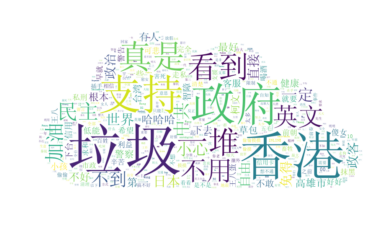

In [77]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

alice_mask = np.array(Image.open("images/cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

#store to file
picture_name = "images/wordcloud.png"
wc.to_file(picture_name)

# show word cloud
#plt.rcParams["figure.figsize"] = (100,80)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()